<a href="https://colab.research.google.com/github/purnaa-l/MiniProject-ML-Models-All/blob/main/health%20versus%20AQI/Predict_Health_Impact_Class_From_AQI(Logistic%20Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('air_quality_health_impact_data.csv')
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = df.drop(columns=['RecordID', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Humidity', 'WindSpeed'])
X = df.drop(columns=['HealthImpactClass'])  # Features
y = df['HealthImpactClass']                 # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [7]:
# ----------------------
# Model Evaluation
# ----------------------
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



Confusion Matrix:
[[952   0   1   0   0]
 [ 10 106   8   0   0]
 [ 12  10  31   0   0]
 [ 10   2   8   0   0]
 [  9   3   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       953
         1.0       0.88      0.85      0.87       124
         2.0       0.63      0.58      0.61        53
         3.0       0.00      0.00      0.00        20
         4.0       0.00      0.00      0.00        13

    accuracy                           0.94      1163
   macro avg       0.49      0.49      0.49      1163
weighted avg       0.91      0.94      0.92      1163



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.9363714531384351

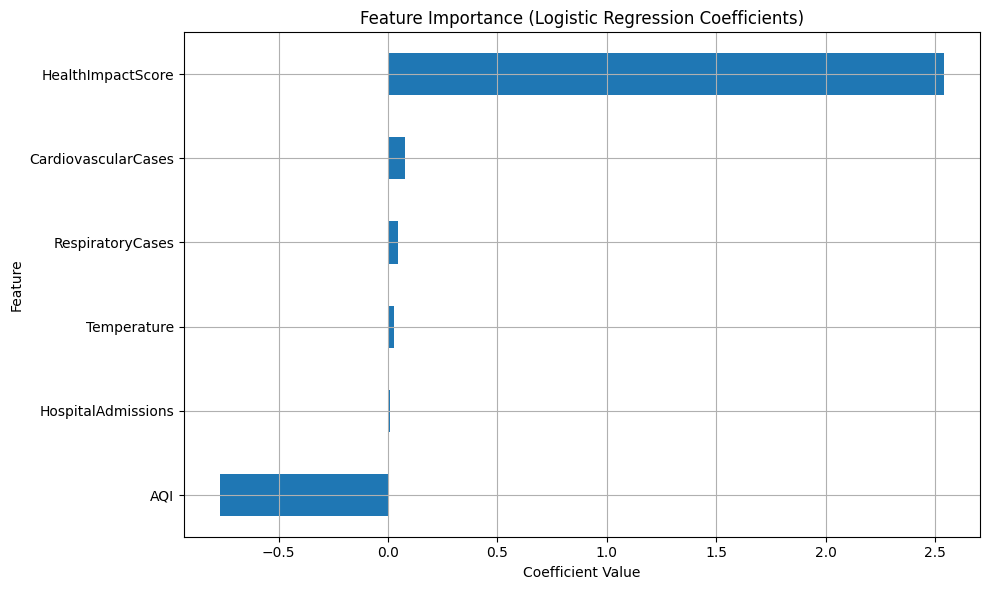

In [8]:
# ----------------------
# Optional: Feature Importance
# ----------------------
coefficients = pd.Series(model.coef_[0], index=df.columns[:-1])
plt.figure(figsize=(10,6))
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()